In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
                  

In [11]:
df = pd.read_csv("Election_Data.csv",parse_dates=["time"])

df

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-07-10 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-07-10 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-07-10 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-07-10 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [12]:
df.shape

(21643, 28)

In [13]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [14]:
df.dtypes

TimeElapsed                          int64
time                        datetime64[ns]
territoryName                       object
totalMandates                        int64
availableMandates                    int64
numParishes                          int64
numParishesApproved                  int64
blankVotes                           int64
blankVotesPercentage               float64
nullVotes                            int64
nullVotesPercentage                float64
votersPercentage                   float64
subscribedVoters                     int64
totalVoters                          int64
pre.blankVotes                       int64
pre.blankVotesPercentage           float64
pre.nullVotes                        int64
pre.nullVotesPercentage            float64
pre.votersPercentage               float64
pre.subscribedVoters                 int64
pre.totalVoters                      int64
Party                               object
Mandates                             int64
Percentage 

In [15]:
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [16]:
df["time"].value_counts()

2019-06-10 22:40:00    403
2019-06-10 21:05:00    403
2019-07-10 00:35:00    403
2019-06-10 22:00:00    403
2019-06-10 23:55:00    403
2019-06-10 22:35:00    403
2019-06-10 21:15:00    403
2019-06-10 23:10:00    403
2019-06-10 21:50:00    403
2019-06-10 23:45:00    403
2019-06-10 22:25:00    403
2019-07-10 00:30:00    403
2019-06-10 23:00:00    403
2019-06-10 22:45:00    403
2019-06-10 21:40:00    403
2019-06-10 23:35:00    403
2019-06-10 22:15:00    403
2019-07-10 00:20:00    403
2019-06-10 20:55:00    403
2019-06-10 22:50:00    403
2019-06-10 21:30:00    403
2019-06-10 23:25:00    403
2019-06-10 22:05:00    403
2019-07-10 00:10:00    403
2019-06-10 21:25:00    403
2019-06-10 23:20:00    403
2019-06-10 20:50:00    403
2019-07-10 00:05:00    403
2019-06-10 21:20:00    403
2019-06-10 23:15:00    403
2019-06-10 21:55:00    403
2019-07-10 00:00:00    403
2019-06-10 23:50:00    403
2019-06-10 22:30:00    403
2019-07-10 00:25:00    403
2019-06-10 21:10:00    403
2019-06-10 23:05:00    403
2

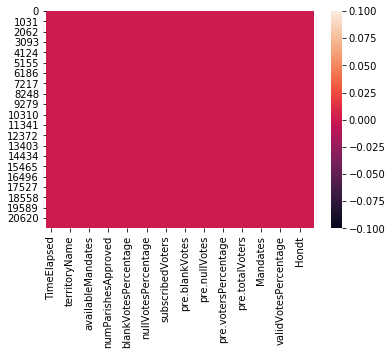

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [19]:
dfcor = df.corr()

dfcor

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,...,-0.106054,0.054761,0.193160,0.196667,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
totalMandates,0.260377,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,...,-0.132143,0.151927,0.972976,0.975404,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,...,-0.044174,0.080524,0.391272,0.383089,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,...,-0.058017,0.026407,0.860782,0.853779,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,...,-0.073301,0.042180,0.949110,0.943147,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,...,-0.150275,0.161642,0.998487,0.998178,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,...,-0.307544,-0.105314,0.002821,-0.000069,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,...,-0.125639,0.154965,0.999296,0.998706,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,...,0.497749,-0.233688,-0.153891,-0.159566,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.029698,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,...,-0.278275,0.909825,0.172542,0.186834,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048


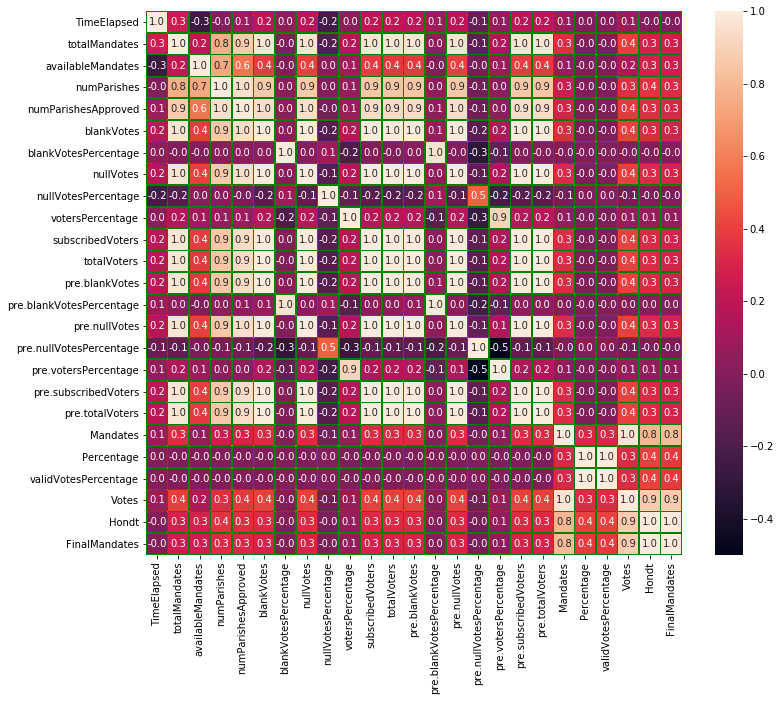

In [20]:
f,ax = plt.subplots(figsize=(12,10))

sns.heatmap(dfcor,annot=True,linewidth=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

In [21]:
df["territoryName"].value_counts()

Braga                  1134
Porto                  1134
Leiria                 1134
Território Nacional    1134
Lisboa                 1080
Madeira                1080
Aveiro                 1080
Coimbra                1080
Viana do Castelo       1080
Setúbal                1080
Viseu                  1080
Guarda                 1026
Faro                   1026
Santarém               1026
Évora                  1026
Castelo Branco          972
Bragança                972
Beja                    918
Portalegre              918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

In [22]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [23]:
df1 = df.copy()

In [24]:
df1 = df.drop(columns=["TimeElapsed","time"])

In [25]:
df1

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [26]:
# Grouping different types of cases as per the date

df_t = df1.groupby(["territoryName"]).sum().sort_values(["FinalMandates"],ascending=False)

In [27]:
df_t

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
territoryName,,,,,,,,,,,,,,,,,,,,,
Território Nacional,128583,127701,3506328,2958858,99038499,2973.18,68719245,2173.71,60444.51,7015787205,...,1925.70,62910.33,7133164941,4013939160,6123,5155.08,5399.65,172147112,12204,12204
Lisboa,17920,33920,144720,87740,12669420,2660.00,8586840,1904.60,61440.20,997470880,...,1793.80,64780.20,987555560,596437180,896,5171.42,5400.07,27418131,2592,2592
Porto,21777,23583,275562,209727,14686896,2531.97,10844841,2010.12,65247.21,1101165828,...,1724.73,66927.42,1099769832,659353359,1037,5183.86,5399.82,29346671,2160,2160
Braga,13566,7980,393498,324849,12418434,3488.52,7063182,2255.61,67335.45,669599385,...,1467.69,67412.73,680355249,408316587,646,5126.71,5399.80,18123679,1026,1026
Setúbal,5460,13980,59400,37100,4534100,2242.20,3287880,1645.00,57048.60,393112000,...,1525.00,62416.40,386801880,225654180,273,5205.51,5400.07,10166888,972,972
Aveiro,8580,8700,158760,116080,7582900,3264.20,4555100,1930.60,58499.00,459790060,...,1808.60,60365.60,466483320,262194300,429,5140.76,5400.58,11897443,864,864
Leiria,5964,5376,124740,97314,6588981,4225.41,4183662,2661.12,61307.40,333057039,...,2267.16,63726.81,341858517,191639973,284,5072.39,5400.22,8009322,540,540
Coimbra,5480,4240,167400,138660,5466140,3725.20,3107920,2245.00,57059.60,300089380,...,1905.00,60034.20,309991120,173380980,274,5101.17,5400.52,7557963,486,486
Faro,5453,3781,68742,57019,3796960,3016.25,2375646,1886.13,48241.57,288384147,...,1728.62,53696.85,284444535,146421980,287,5142.62,5400.13,6651208,486,486


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

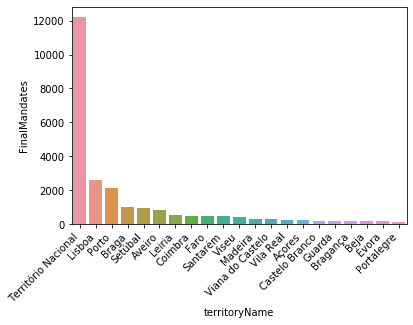

In [28]:
sns.barplot(x=df_t.index,y=df_t["FinalMandates"])
plt.xticks(rotation=45,ha="right")

In [29]:
df1 = df1.drop(columns=["territoryName","Party"])

In [30]:
df1

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,...,1.91,52.66,813743,428546,0,38.29,40.22,147993,94,106
1,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,...,1.91,52.66,813743,428546,0,33.28,34.95,128624,81,77
2,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,...,1.91,52.66,813743,428546,0,6.81,7.15,26307,16,19
3,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,...,1.91,52.66,813743,428546,0,4.90,5.14,18923,12,5
4,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,...,1.91,52.66,813743,428546,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,...,1.90,51.28,371931,190712,0,0.19,0.20,332,0,0
21639,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,...,1.90,51.28,371931,190712,0,0.18,0.19,326,0,0
21640,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,...,1.90,51.28,371931,190712,0,0.14,0.15,256,0,0
21641,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,...,1.90,51.28,371931,190712,0,0.13,0.14,239,0,0


In [31]:
df1.dtypes

totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
dtype: object

In [32]:
df1.columns

Index(['totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'blankVotesPercentage',
       'nullVotes', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Mandates', 'Percentage', 'validVotesPercentage', 'Votes', 'Hondt',
       'FinalMandates'],
      dtype='object')

In [40]:
continuous_vars=['totalMandates','availableMandates','numParishes',
       'numParishesApproved','blankVotes','blankVotesPercentage',
       'nullVotes','nullVotesPercentage','votersPercentage',
       'subscribedVoters','totalVoters','pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters']

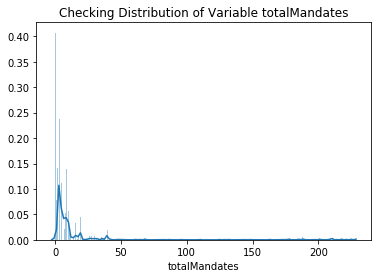

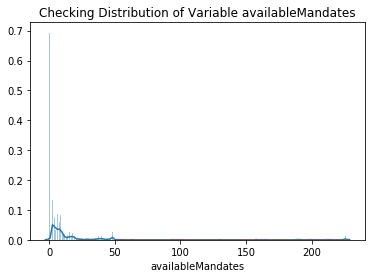

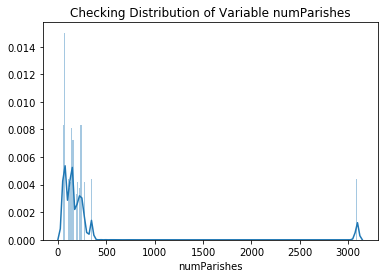

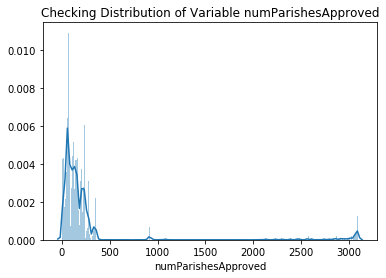

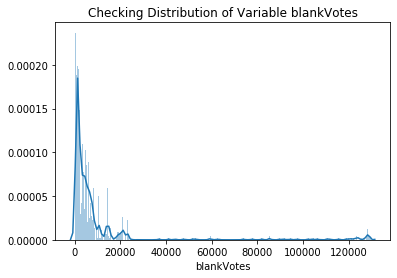

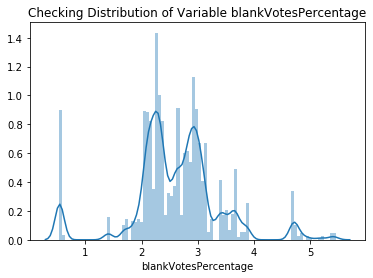

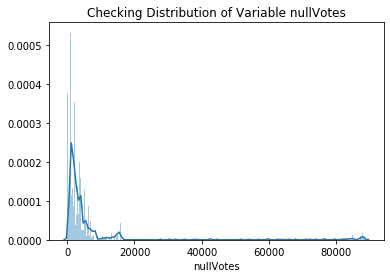

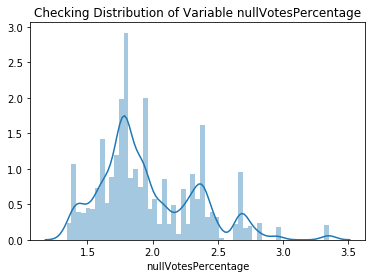

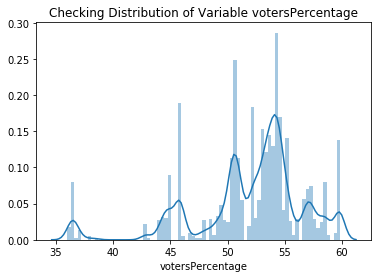

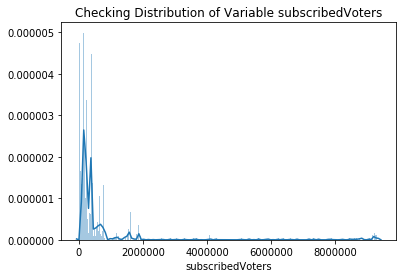

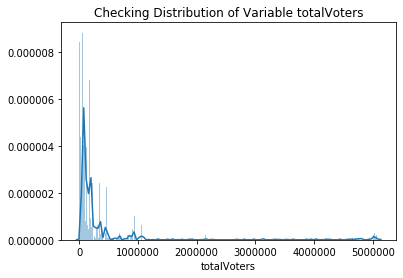

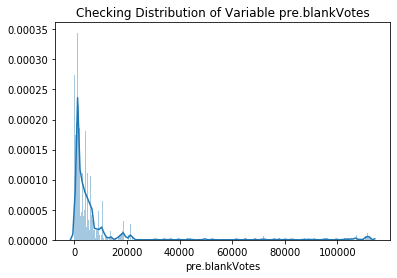

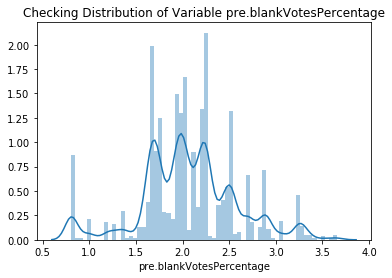

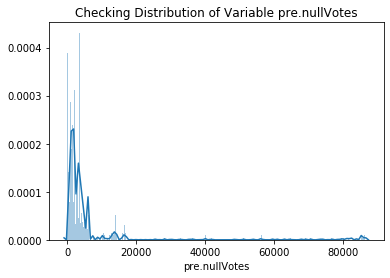

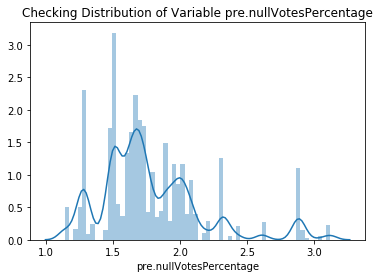

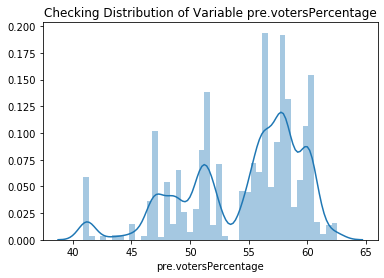

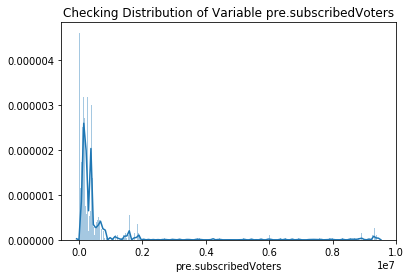

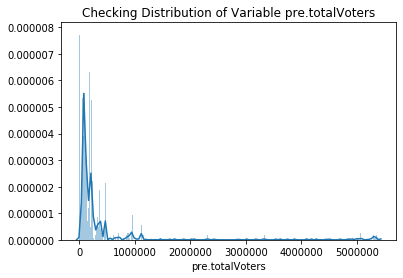

In [41]:
# Checking if there is any normally distributed variable in data

for i in continuous_vars:
    sns.distplot(df1[i],bins='auto')
    plt.title("Checking Distribution of Variable "+str(i))
    plt.show()

totalMandates                   AxesSubplot(0.125,0.71587;0.0945122x0.16413)
availableMandates            AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
numParishes                  AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
numParishesApproved          AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
blankVotes                   AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
blankVotesPercentage         AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
nullVotes                    AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
nullVotesPercentage            AxesSubplot(0.125,0.518913;0.0945122x0.16413)
votersPercentage            AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
subscribedVoters            AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
totalVoters                 AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
pre.blankVotes              AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
pre.blankVotesPercentage    AxesSubplot(0.692073,0.518913;0.0945122x0.16413)

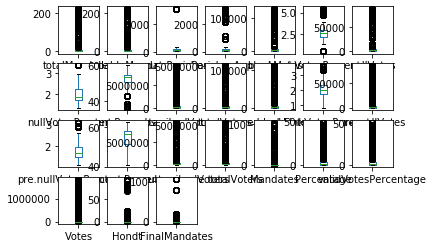

In [42]:
df1.plot(kind='box',subplots=True,layout=(4,7))

In [43]:
df

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-06-10 20:10:00,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-07-10 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-07-10 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-07-10 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-07-10 00:35:00,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [44]:
df = df.drop(["time"],axis=1)

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["territoryName"] = le.fit_transform(df["territoryName"])

df["Party"] = le.fit_transform(df["Party"])

In [46]:
df

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,0,16,0,226,3092,1081,9652,2.50,8874,2.30,...,52.66,813743,428546,11,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,19,8,0,277,277,4995,2.81,3700,2.08,...,51.28,371931,190712,9,0,0.19,0.20,332,0,0
21639,265,19,8,0,277,277,4995,2.81,3700,2.08,...,51.28,371931,190712,14,0,0.18,0.19,326,0,0
21640,265,19,8,0,277,277,4995,2.81,3700,2.08,...,51.28,371931,190712,8,0,0.14,0.15,256,0,0
21641,265,19,8,0,277,277,4995,2.81,3700,2.08,...,51.28,371931,190712,18,0,0.13,0.14,239,0,0


In [47]:
from scipy.stats import zscore

z_score = np.abs(zscore(df))
print(df.shape)
df_new = df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(21643, 27)
(18333, 27)


In [48]:
x = df_new.drop("FinalMandates",axis=1)
y = df_new["FinalMandates"]

In [51]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x)

In [52]:
# defining a common function here for all Regression model and there by finding the best random state having highest r2 score

regr = LinearRegression()
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score) 
    return final_r_state

In [53]:
# Using LinearRegression
lreg = LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.9847314696256859
r2 score corresponding to 43 is 0.9874410743298249
r2 score corresponding to 44 is 0.9879502090393173
r2 score corresponding to 45 is 0.9850635760328039
r2 score corresponding to 46 is 0.9875572270590472
r2 score corresponding to 47 is 0.9905663085824371
r2 score corresponding to 48 is 0.983936390352911
r2 score corresponding to 49 is 0.9831248779513154
r2 score corresponding to 50 is 0.9852491057690962
r2 score corresponding to 51 is 0.9837985508536058
r2 score corresponding to 52 is 0.9844470256914967
r2 score corresponding to 53 is 0.9862900482710119
r2 score corresponding to 54 is 0.9810410342603071
r2 score corresponding to 55 is 0.982226813455587
r2 score corresponding to 56 is 0.9872875794429197
r2 score corresponding to 57 is 0.9836993828102994
r2 score corresponding to 58 is 0.9860817644593328
r2 score corresponding to 59 is 0.9826572002839855
r2 score corresponding to 60 is 0.9857782802010445
r2 score corresponding to 61 is 0

In [54]:
# Lets chaeck the mean r2 score of both Linear regression model and knn  regression
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())


Mean r2 score for Linear Regression:  0.9881700842030738
standard deviation in r2 score for Linear Regression:  0.014322188526029806


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=47,test_size=0.20)
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_pred= lr.predict(x_test)

In [58]:
lrscore= lr.score(x_train,y_train)
print(lrscore*100)

98.4122480550852


In [59]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is: 0.15599109111233417
r2_score is: 0.9905663085824371


In [60]:
from sklearn.externals import joblib

In [62]:
#Save the model as a pickle in a file
joblib.dump(lr,"lrelection.pkl")

['lrelection.pkl']

In [63]:
model=joblib.load("lrelection.pkl")